In [66]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, timedelta
from matplotlib.pyplot import cm
%matplotlib inline
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot
from numpy.linalg import norm



In [ ]:
# event info, text info 
# how to build event counterfactual data
# nearest neighbor 
# consider graph matching ?
# 1. location of two samples should be close. 
# test the cf data? train use such data, and see test results

# consider multiple time steps....

In [ ]:
# use text, because event type, entity are inferred or extracted from the text. (ACLED)
# 1. sentiment pos, neg, neu
# 2. semantic, embedding of sentences/summaries?
# [use existed approaches? up]
# 3. (sub) event count 


# control other features... 
# for each event type?
# 1.  similar event pattern (time series, [25*14] Pearson Correlation Coefficient is invariant to scaling of a series)
# similar semantic and sentiment of each day?.
# average, max, min,
# 2. bag of words sequence ? each day we have a vector representing docs. overval semantics similar? a vector for all historical days
# # get vocab, word count and use [tf-idf]


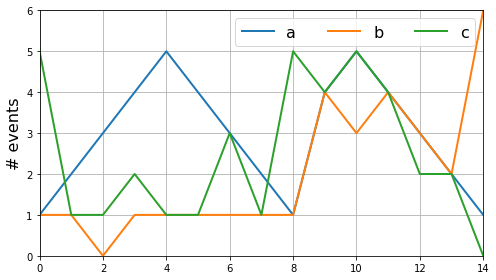

In [67]:
a = np.array([1,2,3,4,5,4,3,2,1,4,5,4,3,2,1])
b = np.array([1,1,0,1,1,1,1,1,1,4,3,4,3,2,6])
c = np.array([5,1,1,2,1,1,3,1,5,4,5,4,2,2,0])
# Fixing random state for reproducibility


fig, axs = plt.subplots(1, 1,figsize=(7, 4))
axs.plot(list(range(len(a))), a, '-',label='a' ,linewidth=2)
axs.plot(list(range(len(a))), b, '-',label='b' ,linewidth=2)
axs.plot(list(range(len(a))), c, '-',label='c' ,linewidth=2)


def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

# axs.set_xlabel(level,fontsize=16)
axs.set_ylabel('# events',fontsize=16)
axs.grid(True)
axs.legend(prop={'size': 16},ncol=3)
axs.margins(0.0)
# axs.set_title('{} {}-level'.format(country_name,level))
# axs.set_title('Yemen week-level')
fig.tight_layout()
plt.show()
# fig.savefig('time_series/{}_{}_sub.pdf'.format(country_name,level), bbox_inches='tight')


In [103]:


print(pearsonr(a,b))
print(pearsonr(a,c))
print(pearsonr(b,c))
 
print(cosine_similarity([a],[b]))
print(cosine_similarity([a],[c]))
print(cosine_similarity([b],[c]))


(0.0, 1.0000000000000004)
(0.04374665303455283, 0.8769758309373958)
(0.05022230720753165, 0.8589221924005253)
[[0.71171699]]
[[0.76366795]]
[[0.66569414]]


In [85]:
def movingaverage(a, n=3) :
    padding = []
    for i in range(n-1):
        padding.append(a[:i+1].mean())
    padding = np.array(padding)
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return np.concatenate((padding, ret[n - 1:] / n),0)


a2 = movingaverage(a,6)
b2 = movingaverage(b,6)
c2 = movingaverage(c,6)
 
print(pearsonr(a2,b2))
print(pearsonr(a2,c2))
print(pearsonr(b2,c2))

print(cos_sim(a2,b2))
print(cos_sim(a2,c2))
print(cos_sim(b2,c2))
    
print(cosine_similarity([a2],[b2]))
print(cosine_similarity([a2],[c2]))
print(cosine_similarity([b2],[c2]))


(0.3131849431930498, 0.25569697876361264)
(-0.5297615974511058, 0.042245911425533106)
(0.453324531574127, 0.08968235121738981)
0.8686729285224668
0.8754405955814023
0.8852045475164405
[[0.86867293]]
[[0.8754406]]
[[0.88520455]]


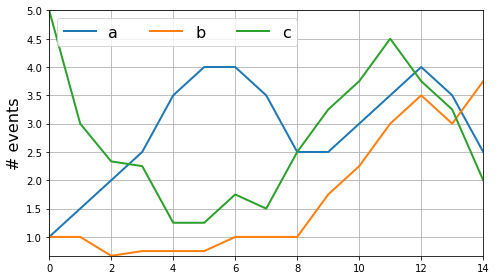

In [83]:
fig, axs = plt.subplots(1, 1,figsize=(7, 4))
axs.plot(list(range(len(a2))), a2, '-',label='a' ,linewidth=2)
axs.plot(list(range(len(a2))), b2, '-',label='b' ,linewidth=2)
axs.plot(list(range(len(a2))), c2, '-',label='c' ,linewidth=2)


# axs.set_xlabel(level,fontsize=16)
axs.set_ylabel('# events',fontsize=16)
axs.grid(True)
axs.legend(prop={'size': 16},ncol=3)
axs.margins(0.0)
# axs.set_title('{} {}-level'.format(country_name,level))
# axs.set_title('Yemen week-level')
fig.tight_layout()
plt.show()

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
#     'This is the 1 document 222.',
#     'This document is the 2 document.',
#     'And this is the 3 1.',
#     'Is this the 1 document?',
    ['This', 'is', 'the', '1', 'document', '222'],
    ['This', 'document', 'the', '1', 'document']
]
vectorizer = TfidfVectorizer(token_pattern='words',tokenizer=(lambda x:x), lowercase=False)#token_pattern=r'(?u)\b\w*[a-zA-Z]\w*\b') # stopwords='english' u'(?u)\b\w*[a-zA-Z]\w*\b
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.shape)
X.todense()
for i in range(len(X.toarray())):
    print(list(X.toarray()[i]))

['1', '222', 'This', 'document', 'is', 'the']
(2, 6)
[0.35464863330313684, 0.49844627974580596, 0.35464863330313684, 0.35464863330313684, 0.49844627974580596, 0.35464863330313684]
[0.3779644730092272, 0.0, 0.3779644730092272, 0.7559289460184544, 0.0, 0.3779644730092272]
